In [64]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

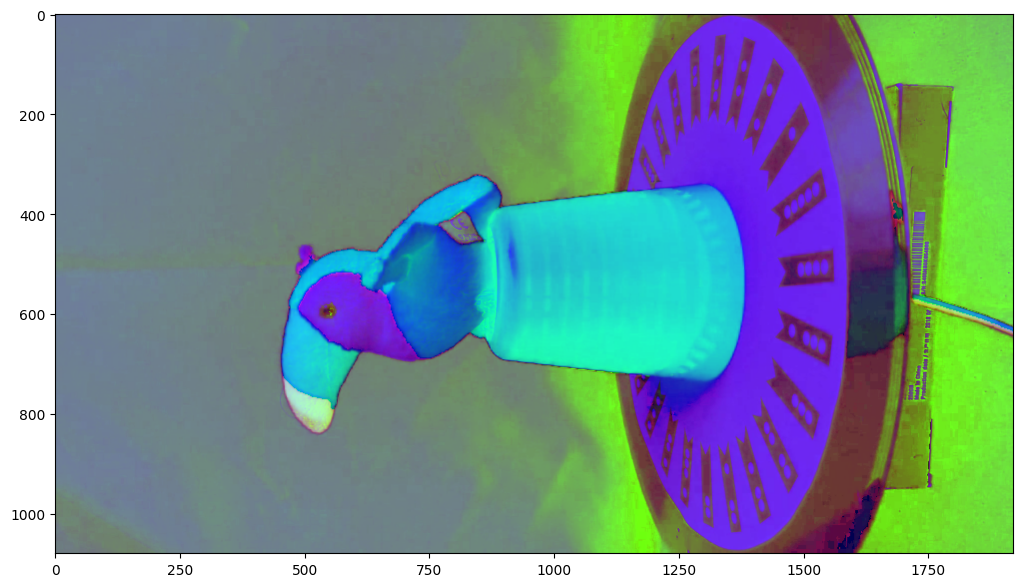

In [65]:
image = cv.imread("./assignment1_test_dataset/obj01/000002.png").astype(np.uint8)

rgb_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
gray_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
hsv_img = cv.cvtColor(image, cv.COLOR_BGR2HSV)
yuv_img = cv.cvtColor(image, cv.COLOR_BGR2YUV)

plt.figure(figsize=(15,7))
plt.imshow(hsv_img)

In [66]:
#rgb_img = cv.rectangle(rgb_img, (1250,0), (image.shape[1], image.shape[0]), (40,40,40), -1)

#plt.figure(figsize=(15,7))
#plt.imshow(rgb_img)

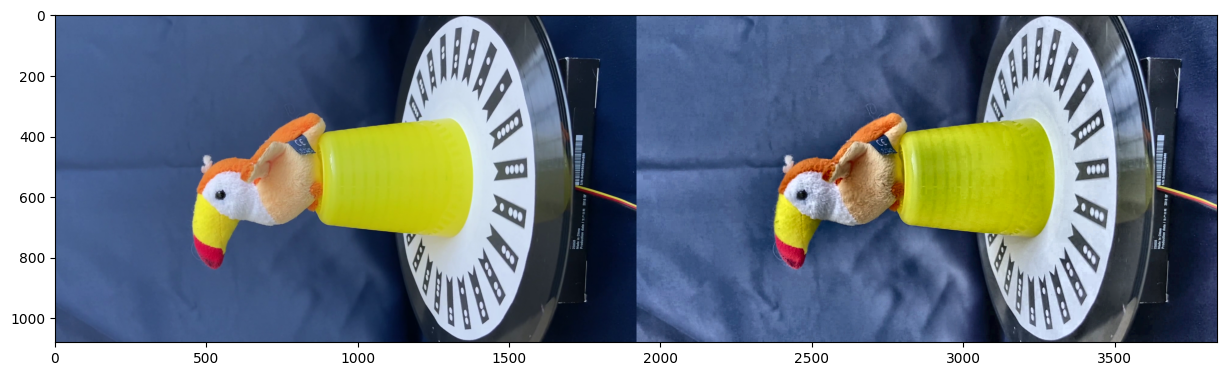

In [67]:
lab = cv.cvtColor(rgb_img, cv.COLOR_RGB2LAB)
l_channel, a, b = cv.split(lab)

# Applying CLAHE to L-channel
#3.0, (5,5)
l_clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(15,15))
l_channel = l_clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv.merge((l_channel,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv.cvtColor(limg, cv.COLOR_LAB2RGB)


# Stacking the original image with the enhanced image
result = np.hstack((rgb_img, enhanced_img))
plt.figure(figsize=(15,7))
plt.imshow(result)

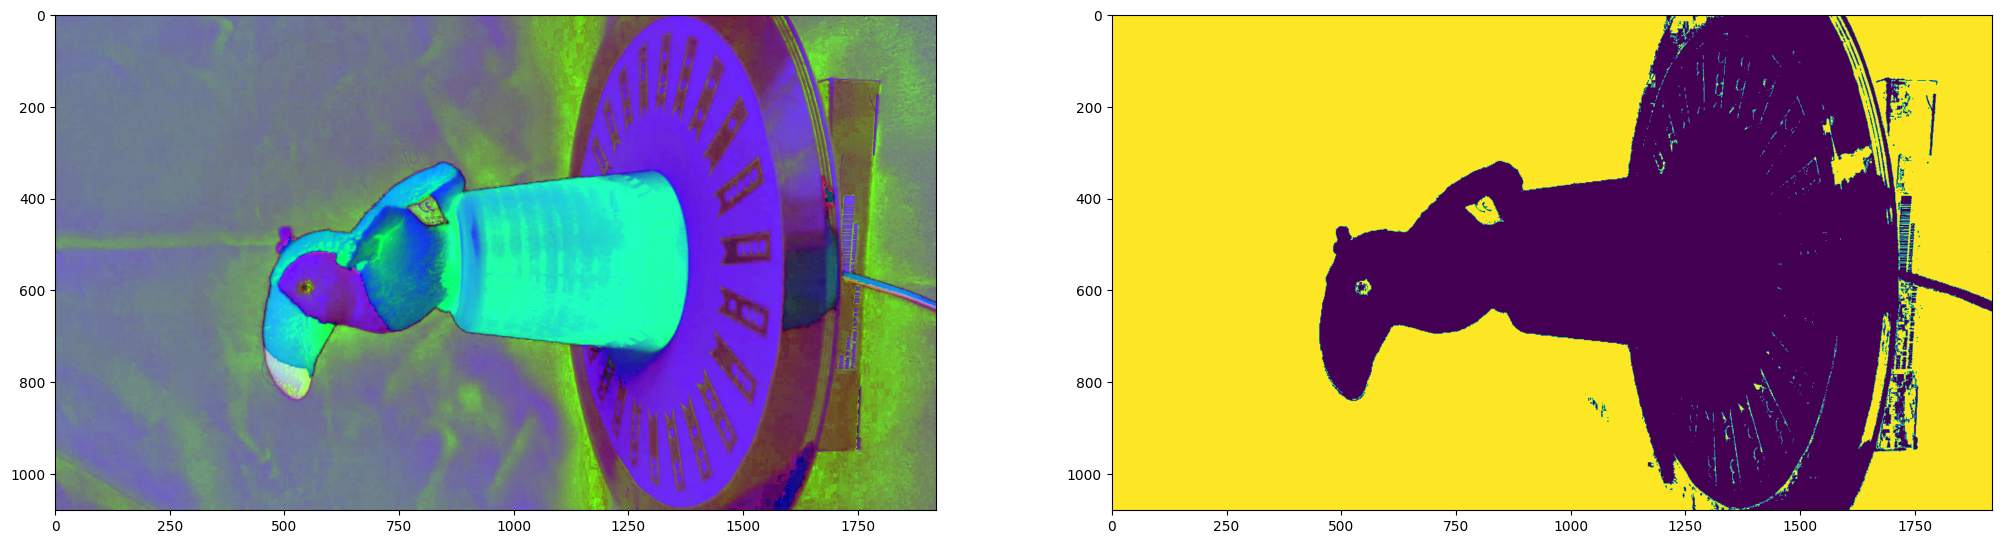

In [68]:
new_hvs = cv.cvtColor(enhanced_img, cv.COLOR_RGB2HSV)

#100,70,40   130,255,255
# lower blu - upper blu
#blu_mask = cv.inRange(new_hvs, np.array([110,90,10]), np.array([160,255,255]))

blu_mask = cv.inRange(new_hvs, np.array([100,80,10]), np.array([160,255,255]))


# lower black - upper black
#green_mask = cv.inRange(new_hvs, (136, 100, 90), (70, 255,255))


#thresh = cv.bitwise_or(blu_mask, green_mask)

thresh = blu_mask

plt.figure(figsize=(25,17))
plt.subplot(2,2,1)
plt.imshow(new_hvs)
plt.subplot(2,2,2)
plt.imshow(blu_mask)#cv.bitwise_and(new_hvs, new_hvs, mask=blu_mask)

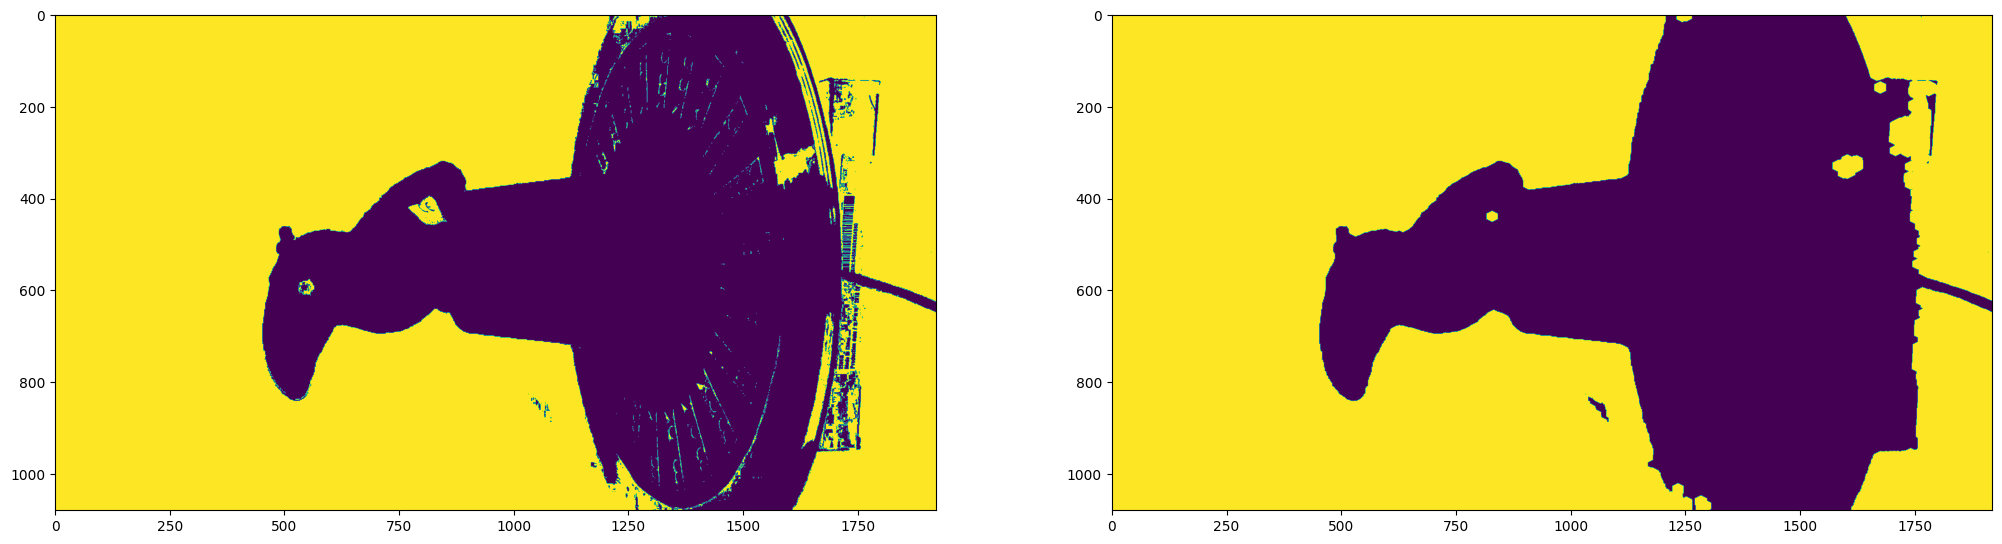

In [71]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
#kernel = np.ones((5,5), np.uint8)

#erosion = cv.erode(thresh, kernel, iterations = 2)#2
closing = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=7)


plt.figure(figsize=(25,17))
plt.subplot(2,2,1)
plt.imshow(thresh)
plt.subplot(2,2,2)
plt.imshow(closing)

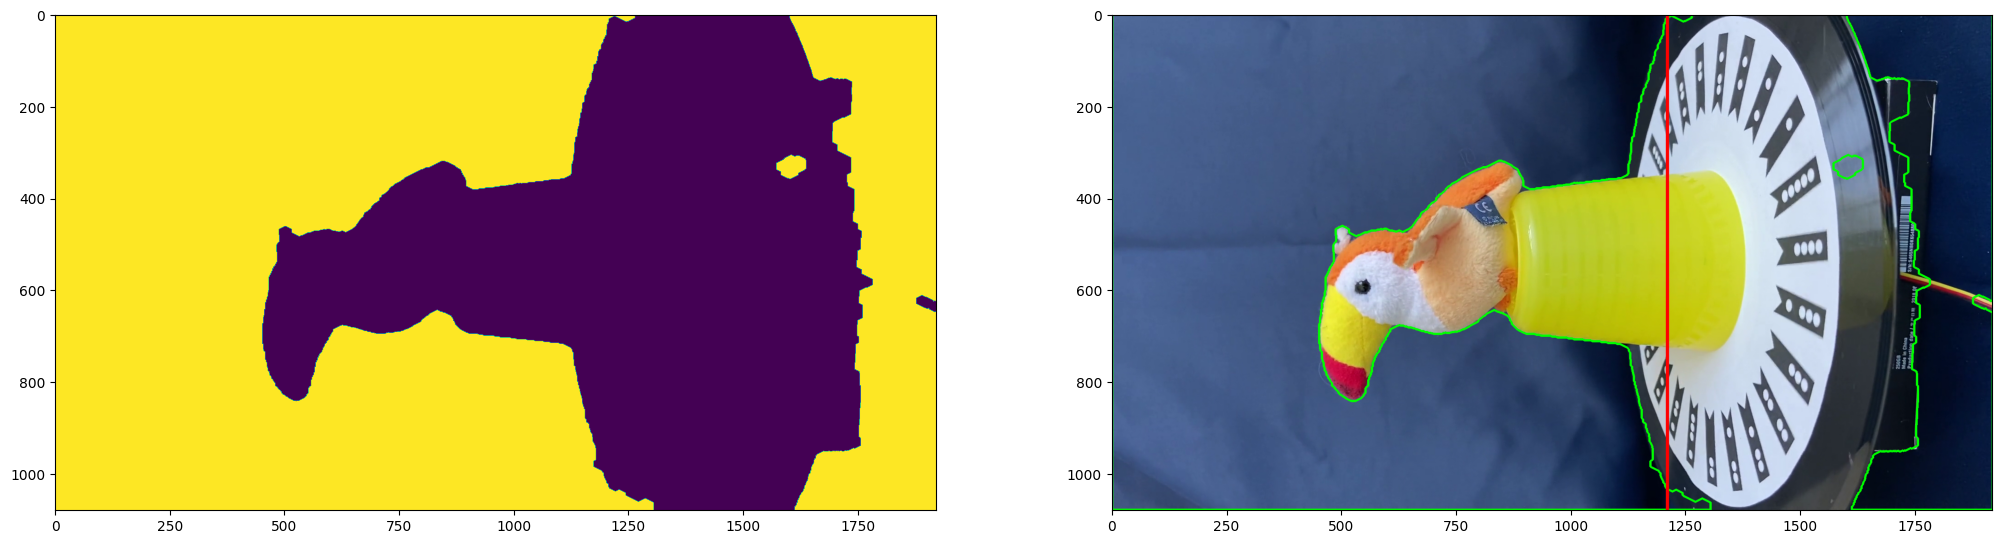

In [70]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))

opening = cv.morphologyEx(closing, cv.MORPH_CLOSE, kernel, iterations = 6)

contours, hierarchy = cv.findContours(opening, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(rgb_img, contours, -1, (0,255,0), 3)

cv.line(rgb_img, (1210,1080), (1210,0), (255, 0, 0), 5) 

plt.figure(figsize=(25,17))
plt.subplot(2,2,1)
plt.imshow(opening)
plt.subplot(2,2,2)
plt.imshow(rgb_img)
